# Validation of the Models on the Test Sets

This notebook aims to show how the trained models behave with new data

In [183]:
import os
import joblib
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, recall_score, f1_score, ConfusionMatrixDisplay

# definition of constants
DATASOURCE = '../../data/3_model_data'
MODELS = '../../models'

## Regression Model Validation

In [184]:
# load regression test data
reg_data = pd.read_csv(os.path.join(DATASOURCE, 'test_regression.csv'))
reg_data.head()

,runtime,tag2,tag3,tag4,tag7,tag9,tag11,tag12,tag14,tag15,tag17,tag20,tag21,rul
0,1,643.02,1585.29,1398.21,553.90,9050.17,47.20,521.72,8125.55,8.4052,392,38.86,23.3735,191
1,2,641.71,1588.45,1395.42,554.85,9054.42,47.50,522.16,8139.62,8.3803,393,39.02,23.3916,190
2,3,642.46,1586.94,1401.34,554.11,9056.96,47.50,521.97,8130.10,8.4441,393,39.08,23.4166,189
3,4,642.44,1584.12,1406.42,554.07,9045.29,47.28,521.38,8132.90,8.3917,391,39.00,23.3737,188
4,5,642.51,1587.19,1401.92,554.16,9044.55,47.31,522.15,8129.54,8.4031,390,38.99,23.4130,187


In [185]:
# drop negative rul
reg_data = reg_data.loc[reg_data.rul >= 0, :]

In [186]:
# load regression model
reg_model = joblib.load(os.path.join(MODELS, 'regression_model.m'))

In [187]:
# make the predictions with the model
x = reg_data.drop(['rul'], axis=1)
reg_data['rul_pred'] = reg_model.predict(x)

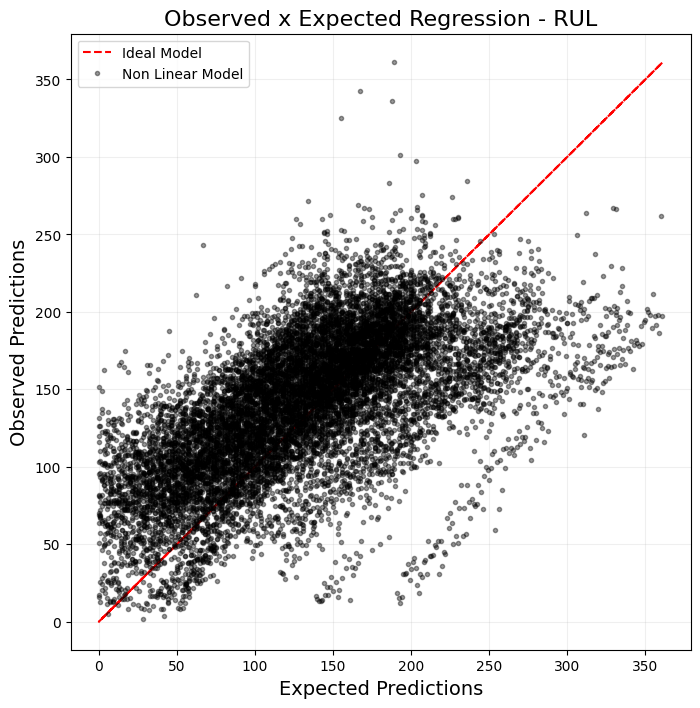

In [188]:
# expected vs observed plot
plt.figure(figsize=(8, 8))
plt.plot(reg_data['rul'], reg_data['rul'], 'r--', label='Ideal Model')
plt.plot(reg_data['rul'], reg_data['rul_pred'], 'k.', alpha=0.4, label='Non Linear Model')
plt.legend(loc='best')
plt.xlabel('Expected Predictions', size=14)
plt.ylabel('Observed Predictions', size=14)
plt.title('Observed x Expected Regression - RUL', size=16)
plt.grid(True, alpha=0.2)
plt.show()

In [189]:
print('Mean Absolute Error: ', mean_absolute_error(reg_data['rul'], reg_data['rul_pred']))
print('R2 Score: ', r2_score(reg_data['rul'], reg_data['rul_pred']))

Mean Absolute Error:  39.96812770999382
R2 Score:  0.3794927099598362


In [190]:
# analysis of residues
reg_data['residues'] = reg_data['rul'] - reg_data['rul_pred']

# calculate error margin
em = 1.96 * abs(reg_data['residues']).std()/np.sqrt(reg_data.shape[0])

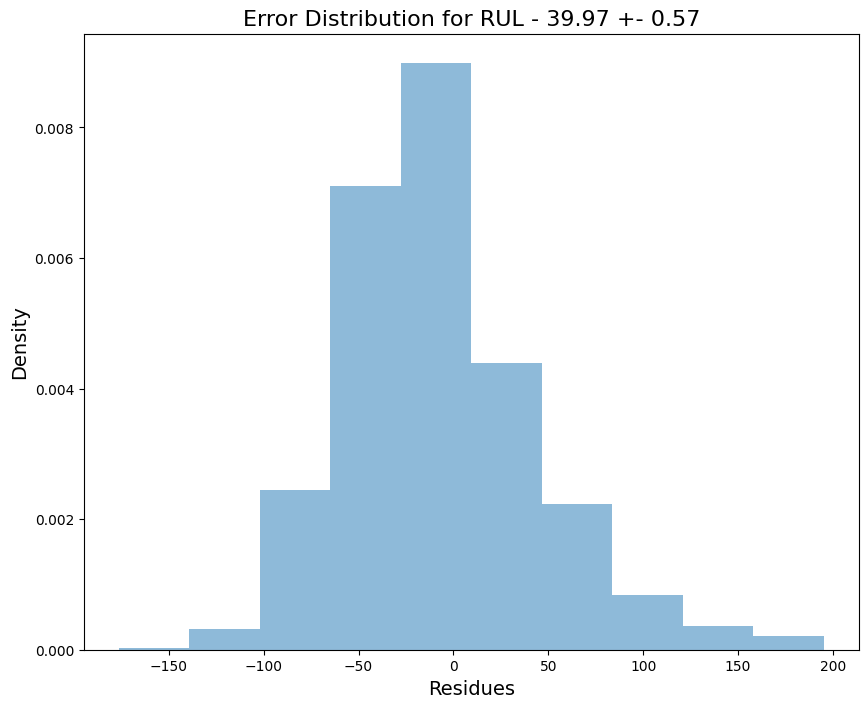

In [191]:
# plot distributions of residues
plt.figure(figsize=(10, 8))
plt.hist(reg_data['residues'], density=True, alpha=0.5)
plt.xlabel('Residues', size=14)
plt.ylabel('Density', size=14)
plt.title(f'Error Distribution for RUL - {round(abs(reg_data["residues"]).mean(), 2)} +- {round(em, 2)}', size=16)
plt.show()

## Classification Model Validation

In [192]:
# load classification test data
class_data = pd.read_csv(os.path.join(DATASOURCE, 'test_classification.csv'))
class_data.head()

,runtime,tag2,tag3,tag4,tag7,tag9,tag11,tag12,tag14,tag15,tag17,tag20,tag21,categ
0,1,643.02,1585.29,1398.21,553.90,9050.17,47.20,521.72,8125.55,8.4052,392,38.86,23.3735,0
1,2,641.71,1588.45,1395.42,554.85,9054.42,47.50,522.16,8139.62,8.3803,393,39.02,23.3916,0
2,3,642.46,1586.94,1401.34,554.11,9056.96,47.50,521.97,8130.10,8.4441,393,39.08,23.4166,0
3,4,642.44,1584.12,1406.42,554.07,9045.29,47.28,521.38,8132.90,8.3917,391,39.00,23.3737,0
4,5,642.51,1587.19,1401.92,554.16,9044.55,47.31,522.15,8129.54,8.4031,390,38.99,23.4130,0


In [193]:
# load regression model
class_model = joblib.load(os.path.join(MODELS, 'classification_model.m'))

In [194]:
# make the predictions with the model
x = class_data.drop(['categ'], axis=1)
class_data[['prob0', 'prob1']] = class_model.predict_proba(x)

In [195]:
class_data.tail(100)

,runtime,tag2,tag3,tag4,tag7,tag9,tag11,tag12,tag14,tag15,tag17,tag20,tag21,categ,prob0,prob1
12996,99,642.31,1579.08,1398.98,554.23,9056.00,47.42,522.13,8142.69,8.4008,393,39.00,23.3805,0,0.998687,0.001313
12997,100,642.62,1587.32,1392.10,554.48,9066.45,47.28,522.17,8143.47,8.4119,393,39.07,23.2803,0,0.999337,0.000663
12998,101,642.28,1588.91,1402.97,553.79,9066.53,47.10,522.21,8142.26,8.3581,390,38.81,23.3259,0,0.999167,0.000833
12999,102,641.86,1586.63,1407.89,553.77,9068.75,47.29,522.11,8139.38,8.4149,392,39.06,23.4032,0,0.997685,0.002315
13000,103,642.38,1584.90,1403.31,553.64,9062.82,47.19,521.93,8148.92,8.3945,393,38.96,23.3068,0,0.997908,0.002092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,643.24,1599.45,1415.79,553.41,9142.37,47.69,520.69,8213.28,8.4715,394,38.65,23.1974,1,0.432008,0.567992
13092,195,643.22,1595.69,1422.05,553.22,9140.68,47.60,521.05,8210.85,8.4512,395,38.57,23.2771,1,0.549842,0.450158
13093,196,643.44,1593.15,1406.82,553.04,9146.81,47.57,521.18,8217.24,8.4569,395,38.62,23.2051,1,0.796719,0.203281
13094,197,643.26,1594.99,1419.36,553.37,9148.85,47.61,521.33,8220.48,8.4711,395,38.66,23.2699,1,0.638431,0.361569


In [211]:
threshold = 0.01
class_data['categ_pred'] = class_data['prob1'].apply(lambda x: 1 if x > threshold else 0)

In [212]:
print('Recall: ', recall_score(class_data['categ'], class_data['categ_pred']))
print('F1 Score: ', f1_score(class_data['categ'], class_data['categ_pred']))

Recall:  0.7695167286245354
F1 Score:  0.607292539815591


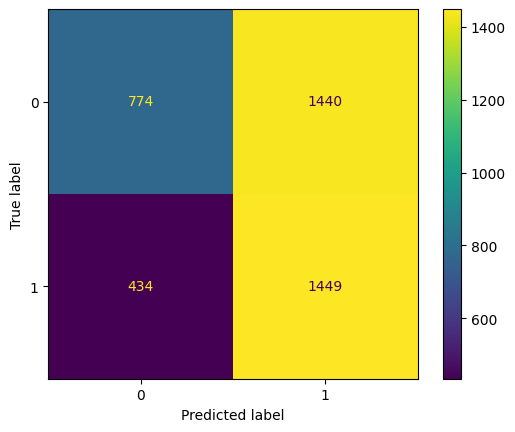

In [213]:
ConfusionMatrixDisplay.from_predictions(class_data['categ'], class_data['categ_pred'])

In [214]:
# make the predictions with the model using advanced life cycles
class_data = pd.read_csv(os.path.join(DATASOURCE, 'test_classification.csv'))
class_data = class_data.loc[class_data.runtime > 100, :]

x = class_data.drop(['categ'], axis=1)
class_data[['prob0', 'prob1']] = class_model.predict_proba(x)

In [215]:
class_data.shape

(4097, 16)

In [217]:
threshold = 0.005
class_data['categ_pred'] = class_data['prob1'].apply(lambda x: 1 if x > threshold else 0)

print('Recall: ', recall_score(class_data['categ'], class_data['categ_pred']))
print('F1 Score: ', f1_score(class_data['categ'], class_data['categ_pred']))

Recall:  0.838024429102496
F1 Score:  0.6221170904790064
